In [1]:
! pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"marquescaio","key":"e10227eb02fb8e598f3b71b8dc06c946"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
!unzip /content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip
!mkdir '/content/'
!mkdir '/content/trabalho/'
!mkdir '/content/trabalho/cyst'
!mkdir '/content/trabalho/stone'
!mkdir '/content/trabalho/tumor'
!mkdir '/content/trabalho/normal'
!cp -v '//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'* '/content/trabalho/normal/'
!cp -v '//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'* '/content/trabalho/cyst/'
!cp -v '//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'* '/content/trabalho/stone/'
!cp -v '//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'* '/content/trabalho/tumor/'

Streaming output truncated to the last 5000 lines.
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3133).jpg' -> '/content/trabalho/cyst/Cyst- (3133).jpg'
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3134).jpg' -> '/content/trabalho/cyst/Cyst- (3134).jpg'
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3135).jpg' -> '/content/trabalho/cyst/Cyst- (3135).jpg'
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3136).jpg' -> '/content/trabalho/cyst/Cyst- (3136).jpg'
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3137).jpg' -> '/content/trabalho/cyst/Cyst- (3137).jpg'
'//content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3138).jpg' -> '/content/tra

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os as os

In [5]:
# fig preprocessing
largura = 40
altura = 40
modo_de_cor = 'grayscale' # rgb, grayscale, rgba
# end fig preprocessing
undersampling_size = -1 # -1 para não fazer undersampling
diretorio = '/content/trabalho/'
targets = [x[0].replace(diretorio,'') for x in os.walk(diretorio)]
targets = targets[1:len(targets)] # exclui o primeiro da lista pq é o próprio diretório
print(targets)

dados = []

for classe in targets:
    imagens = os.listdir(diretorio+classe)
    i = 0
    for img in imagens:
        i+=1
        
        if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
            dados.append([diretorio+classe+'/'+img,classe])
        
        if(i == undersampling_size and undersampling_size != -1):
            break

dados = np.array(dados)

np.random.shuffle(dados)
            
df_dados = pd.DataFrame(dados,columns=['image','target'])

df_dados

['normal', 'cyst', 'stone', 'tumor']


,image,target
0,/content/trabalho/tumor/Tumor- (1122).jpg,tumor
1,/content/trabalho/cyst/Cyst- (2850).jpg,cyst
2,/content/trabalho/normal/Normal- (3449).jpg,normal
3,/content/trabalho/normal/Normal- (2991).jpg,normal
4,/content/trabalho/stone/Stone- (1286).jpg,stone
...,...,...
12441,/content/trabalho/normal/Normal- (2633).jpg,normal
12442,/content/trabalho/cyst/Cyst- (2936).jpg,cyst
12443,/content/trabalho/normal/Normal- (3661).jpg,normal
12444,/content/trabalho/cyst/Cyst- (3685).jpg,cyst


In [9]:
def embedding(img_path,largura,altura,modo_de_cor):
    
    img = image.load_img(img_path, target_size=(largura, altura),color_mode= modo_de_cor)
    embed = image.img_to_array(img)
    shape_entrada = largura*altura*1
    return embed.reshape(shape_entrada)

In [7]:
target = df_dados['target'].array
array_feat = []
for x in dados:
  aux2 = []
  aux = embedding(x[0],largura,altura,modo_de_cor)
  for i in aux:
    aux2.append(i/255)
  array_feat.append(aux2)
df_feat = pd.DataFrame(array_feat)
df_feat

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.619608,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.376471,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.866667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337255,0.384314,...,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.909804,0.0,0.0,0.000000,0.000000,0.0
12442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.321569,...,0.050980,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
12443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
12444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.564706,0.0


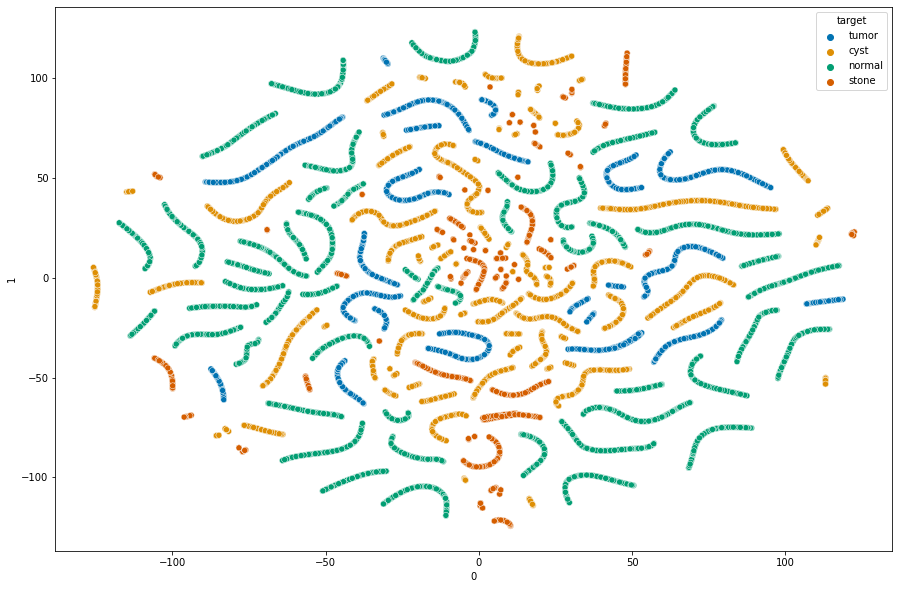

In [10]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15)
array_red = model.fit_transform(df_feat) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = target

plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="colorblind")

plt.show()

In [15]:
list_models = ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'XGBClassifier', 'SGDClassifier']
def getModel(model_):
  if model_ == 'RandomForestClassifier':
    return RandomForestClassifier(n_jobs=20)
  elif model_ == 'LogisticRegression':
    return LogisticRegression(n_jobs=20, solver='sag', multi_class='ovr')
  elif model_ == 'KNeighborsClassifier':
    return KNeighborsClassifier(n_neighbors=3,n_jobs=20)
  elif model_ == 'XGBClassifier':
    return XGBClassifier()
  else:
    return SGDClassifier(n_jobs=20,early_stopping=True,validation_fraction=0.05)

In [19]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_feat.values,target,test_size=0.2)
scores_dict = {}
scores_crossval_dict = {}
for mod in list_models:
  model = getModel(mod).fit(X_treino, y_treino)
  score = model.score(X_teste, y_teste)
  scores_dict[mod] = score
  crossval_score = cross_val_score(getModel(mod),df_feat.values,target,cv=10)
  scores_crossval_dict[mod] = np.mean(crossval_score)

scores_dict

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


{'KNeighborsClassifier': 0.9999196787148594,
 'LogisticRegression': 0.9997589715776287,
 'RandomForestClassifier': 0.9991162075956559,
 'SGDClassifier': 0.9932499774015678,
 'XGBClassifier': 0.9873043298596315}

In [20]:
scores_crossval_dict

{'KNeighborsClassifier': 1.0,
 'LogisticRegression': 1.0,
 'RandomForestClassifier': 0.9991967871485944,
 'SGDClassifier': 0.9863453815261044,
 'XGBClassifier': 0.9855421686746988}

RandomForestClassifier


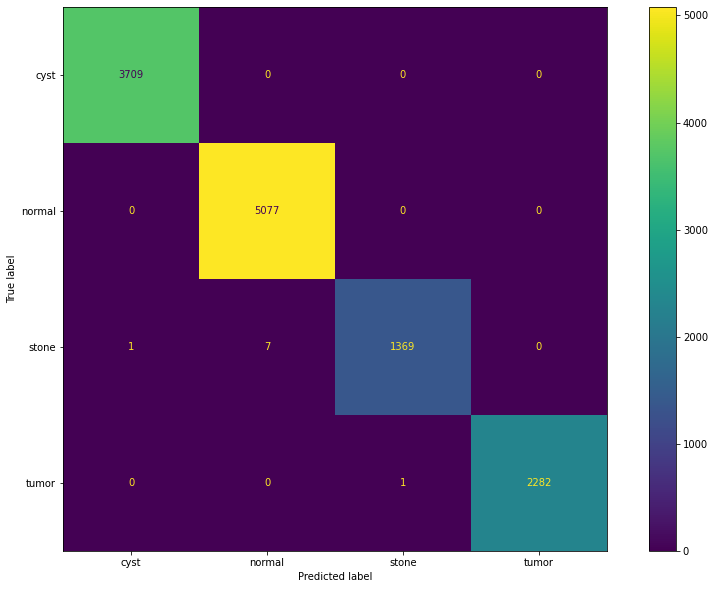

LogisticRegression


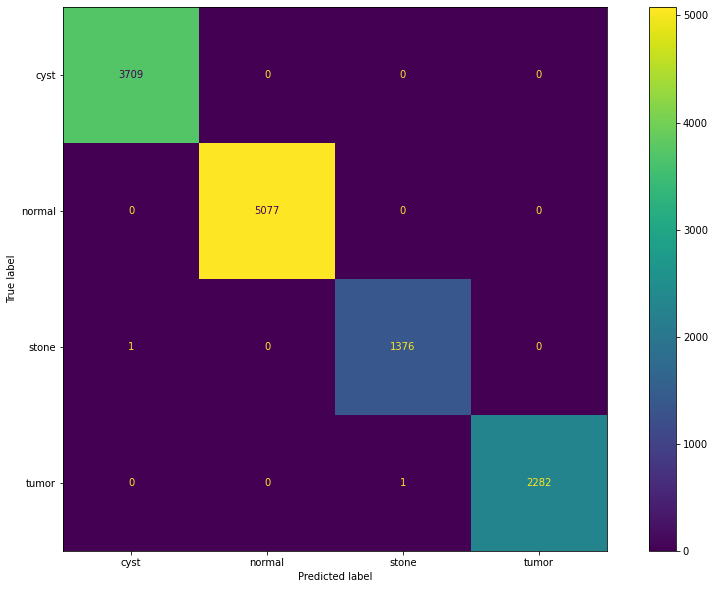

KNeighborsClassifier


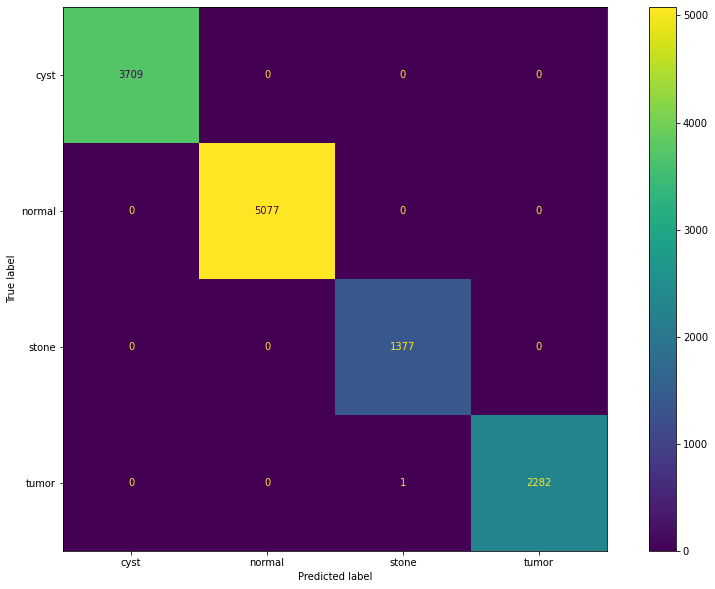

XGBClassifier


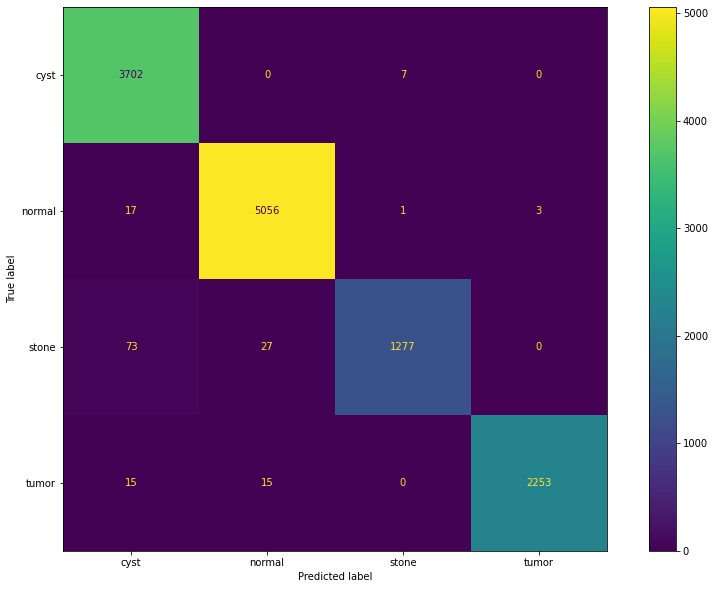

SGDClassifier


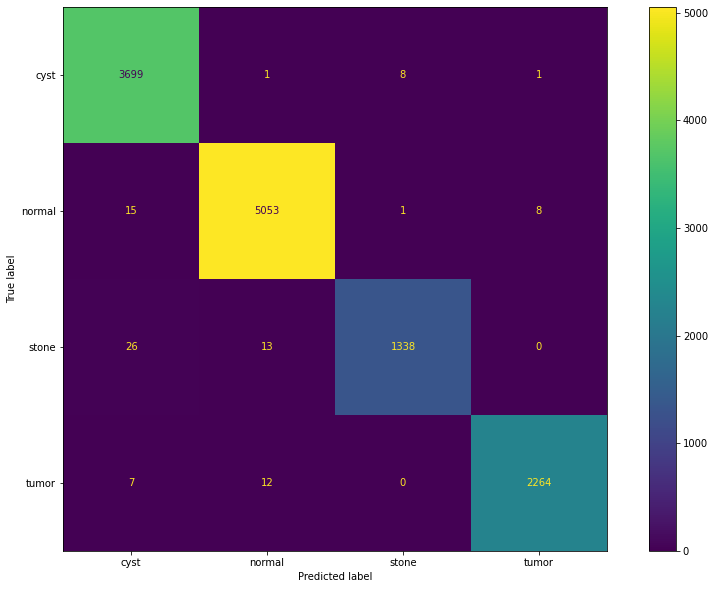

In [18]:
for mod in list_models:
  predicoes = cross_val_predict(getModel(mod),df_feat.values,target,cv=10)
  cm = confusion_matrix(target, predicoes)
  print(mod)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  plt.show()